In [1]:
import matplotlib.pyplot as plt

from MoG import MoG
from utils import generate_2D_clusters

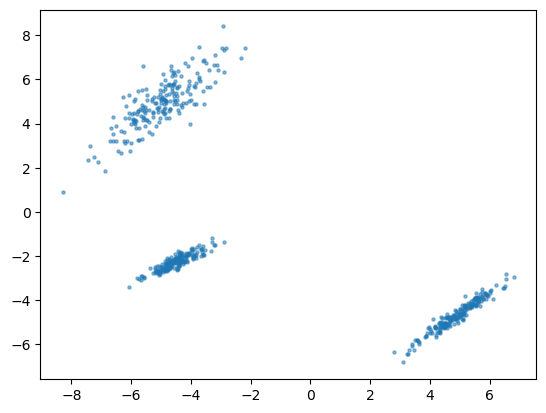

In [3]:
k = 3
domain = [-5,5]

X = generate_2D_clusters(k, points_per_cluster = 200, domain = domain)

plt.scatter(X[:,0], X[:,1], s=5, alpha=0.5)
plt.show()

## EM algorithm

In [7]:
# ------------------------------------------
# Parameters for the EM algorithm
iterations = 20
plotting = False
create_gif = True   # needs pillow package
# ------------------------------------------

gaussian_mixture = MoG(k = k, domain = domain)
gaussian_mixture.init_EM_algorithm(X)
log_likelihoods = [gaussian_mixture.log_likelihood()]


for _ in range(iterations):

    # E-step
    gaussian_mixture.E_step()

    # M-step
    gaussian_mixture.M_step()

    # log-likelihood
    log_likelihoods.append(gaussian_mixture.log_likelihood())

    if gaussian_mixture.iteration % 5 == 0:
        print(f"Iteration {gaussian_mixture.iteration}: log-likelihood = {log_likelihoods[-1]:.2f}")

    gaussian_mixture.plot_MoG(plotting = plotting, n_std = 2)

if create_gif:
    from utils import create_gif
    create_gif(duration = 500)

Iteration 5: log-likelihood = -1791.13
Iteration 10: log-likelihood = -1368.37
Iteration 15: log-likelihood = -1368.37
Iteration 20: log-likelihood = -1368.37
Found 20 frames.
Saved GIF to gaussian_mixture.gif


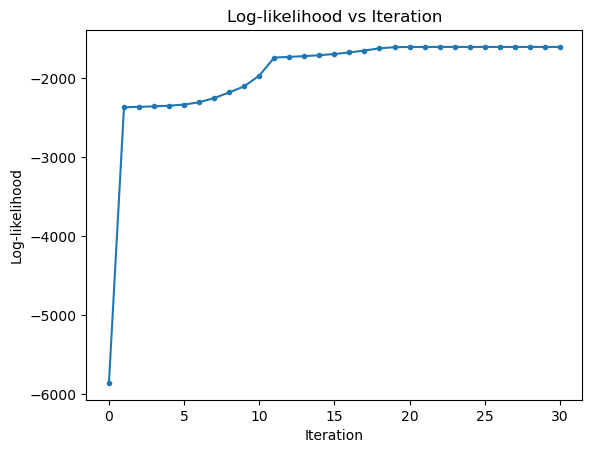

In [7]:
plt.plot(log_likelihoods, marker='.')
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood vs Iteration")
plt.show()